In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

rcParams["font.family"] = "Times"


Kocaeli 11757
Sakarya 4400
Düzce 7506
Bolu 1757
Yalova 3703


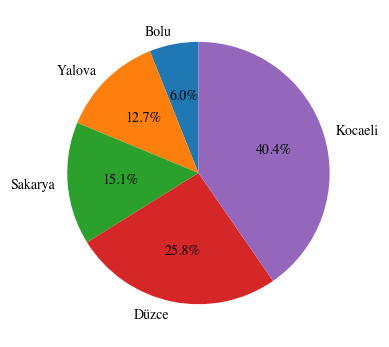

In [3]:
medias = None
labels = []
counts = []
with open("data/belediye_medias.json", "r") as in_file:
    medias = json.load(in_file)

for b in medias:
    labels.append(b["name"])
    counts.append(len(b["medias"]))
    print(b["name"], len(b["medias"]))

labels = np.array(labels)
counts = np.array(counts)
inds = counts.argsort()
labels = labels[inds]
counts = np.sort(counts)
fig1, ax = plt.subplots(figsize=(4, 4))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.savefig("paylasim_oranlari.pdf")
plt.show()


In [80]:
counts.sum()

29123

In [15]:
js = None
with open("data/belediye_200_posts_fixed.json", "r") as in_file:
    js = json.load(in_file)


In [50]:
rows = []
for b in js:
    first_media = b["medias"][0]
    last_media = b["medias"][-1]
    f_ts = first_media["ts"]
    l_ts = last_media["ts"]
    f_d = datetime.fromtimestamp(f_ts)
    l_d = datetime.fromtimestamp(l_ts)
    post_per_day = 200 / (f_d - l_d).days
    row = {
        "Belediye": b["name"],
        "Son okuma": f_d.strftime('%d/%m/%Y'),
        "İlk okuma": l_d.strftime('%d/%m/%Y'),
        "Aradaki gün": (f_d - l_d).days,
        "Günlük ortalama post": "{:.2f}".format(post_per_day)
    }
    rows.append(row)
    # print(row)

df_gunluk = pd.DataFrame(rows)
print(df_gunluk.to_string(index=False))


Belediye  Son okuma  İlk okuma  Aradaki gün Günlük ortalama post
 Kocaeli 10/12/2022 21/11/2022           18                11.11
 Sakarya 10/12/2022 06/11/2022           33                 6.06
   Düzce 10/12/2022 03/11/2022           36                 5.56
    Bolu 08/12/2022 22/04/2022          230                 0.87
  Yalova 01/12/2022 19/10/2022           42                 4.76


In [67]:
population = [
    {"Belediye": "Kocaeli", "Nüfus": 2033441},
    {"Belediye": "Sakarya", "Nüfus": 1060876},
    {"Belediye": "Düzce", "Nüfus": 400976},
    {"Belediye": "Bolu", "Nüfus": 320014},
    {"Belediye": "Yalova", "Nüfus":  291001}
]

df_population = pd.DataFrame(population)
df_population["Nüfus"] = df_population["Nüfus"].apply(lambda x : "{:,}".format(x))
print(df_population.to_string(index=False))


Belediye     Nüfus
 Kocaeli 2,033,441
 Sakarya 1,060,876
   Düzce   400,976
    Bolu   320,014
  Yalova   291,001


In [77]:
pop_dict = {
    "Kocaeli": 2033441,
    "Sakarya": 1060876,
    "Düzce":   400976,
    "Bolu":   320014,
    "Yalova":   291001
}
rows = []
for b in js:
    name = b["name"]
    medias = b["medias"]
    media_cnt = len(medias)
    # print(name, media_cnt)
    total_comments = 0
    total_likes = 0
    for media in medias:
        com_cnt = media["com_cnt"]
        total_comments += com_cnt
        likes = media["likes"]
        total_likes += likes

    rows.append({
        "Belediye": name,
        "Toplam Post": media_cnt,
        "Toplam Yorum": total_comments,
        "Toplam Begeni": total_likes,
        "Yor/Post": "{:.2f}".format(total_comments / media_cnt),
        "Lik/Post": "{:.2f}".format(total_likes / media_cnt),
        "Yor/Pop": "{:.2f}".format(total_comments / (pop_dict[name] / 1000)),
        "Lik/Pop": "{:.2f}".format(total_likes / (pop_dict[name] / 1000)),
        "Lik/Com": "{:.2f}".format(total_likes/total_comments)
    })

df_cl = pd.DataFrame(rows)
print(df_cl.to_string(index=False))


Belediye  Toplam Post  Toplam Yorum  Toplam Begeni Yor/Post Lik/Post Yor/Pop Lik/Pop Lik/Com
 Kocaeli          199          3245         248080    16.31  1246.63    1.60  122.00   76.45
 Sakarya          200           665          54359     3.33   271.80    0.63   51.24   81.74
   Düzce          200          2078         157811    10.39   789.05    5.18  393.57   75.94
    Bolu          164          3523         172343    21.48  1050.87   11.01  538.55   48.92
  Yalova          199          1309          66142     6.58   332.37    4.50  227.29   50.53
